## Introduction

This project sets up and tests a variety of models to predict time series data. The data comes from the  Federal Reserve Bank of St. Louis and the National Bureau of Labor Statistics, compiled by Skipper Seabold. The data contains 14 U.S. macroeconomic variables.

Data Source: 
- FRED, Federal Reserve Economic Data, Federal Reserve Bank of
    St. Louis; http://research.stlouisfed.org/fred2/; accessed December 15,
    2009.
- Bureau of Labor Statistics, U.S. Department of Labor;
    http://www.bls.gov/data/; accessed December 15, 2009.
- compiled at https://www.statsmodels.org/dev/datasets/generated/macrodata.html

| Variable | Description |
| :- | :- |
| year | 1959q1 - 2009q3 |
| quarter | 1-4 |
| realgdp | Real gross domestic product (Bil. of chained 2005 USD, seasonally adjusted annual rate) |
| realcons | Real personal consumption expenditures (Bil. of chained 2005 USD, seasonally adjusted annual rate) |
| realinv | Real gross private domestic investment (Bil. of chained 2005 USD, seasonally adjusted annual rate) |
| realgovt | Real federal consumption expenditures & gross investment (Bil. of chained 2005 USD, seasonally adjusted annual rate) |
| realdpi | Real private disposable income (Bil. of chained 2005 USD, seasonally adjusted annual rate) |
| cpi | End of the quarter consumer price index for all urban consumers: all items (1982-84 = 100, seasonally adjusted) |
| m1 | End of the quarter M1 nominal money stock (Seasonally adjusted) |
| tbilrate | Quarterly monthly average of the monthly 3-month treasury bill: secondary market rate |
| unemp | Seasonally adjusted unemployment rate (%) |
| pop | End of the quarter total population: all ages incl. armed forces over seas |
| infl | Inflation rate (ln(cpi_{t}/cpi_{t-1}) * 400) |
| realint | Real interest rate (tbilrate - infl) |

In [7]:
import pandas as pd
from sktime.datasets import load_macroeconomic

df = load_macroeconomic().apply(pd.to_numeric)
quarters = pd.period_range('1959Q1', periods=203, freq='Q')
df.index = pd.to_datetime(quarters.to_timestamp(how='end').date)
df.index.freq = 'Q'

# Select target and features
y = df['infl'].astype(float)
X = df.drop(columns=['infl', 'cpi']).astype(float)


C:\Users\Gaming\AppData\Local\Temp\ipykernel_24052\1203257543.py:7: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df.index.freq = 'Q'


In [8]:
df

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 1959-03-31 to 2009-09-30
Freq: QE-DEC
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   realgdp   203 non-null    float64
 1   realcons  203 non-null    float64
 2   realinv   203 non-null    float64
 3   realgovt  203 non-null    float64
 4   realdpi   203 non-null    float64
 5   cpi       203 non-null    float64
 6   m1        203 non-null    float64
 7   tbilrate  203 non-null    float64
 8   unemp     203 non-null    float64
 9   pop       203 non-null    float64
 10  infl      203 non-null    float64
 11  realint   203 non-null    float64
dtypes: float64(12)
memory usage: 20.6 KB


In [10]:
df.describe()

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,7221.171901,4825.293103,1012.863862,663.328640,5310.540887,105.075788,667.927586,5.311773,5.884729,239.724153,3.961330,1.336502
std,3214.956044,2313.346192,585.102267,140.863655,2423.515977,61.278878,455.346381,2.803071,1.458574,37.390450,3.253216,2.668799
min,2710.349000,1707.400000,259.764000,460.400000,1886.900000,28.980000,139.600000,0.120000,3.400000,177.146000,-8.790000,-6.790000
25%,4440.103500,2874.100000,519.147500,527.959500,3276.950000,41.050000,228.650000,3.515000,4.900000,208.631000,2.270000,-0.085000
50%,6559.594000,4299.900000,896.210000,662.412000,4959.400000,104.100000,540.900000,5.010000,5.700000,236.348000,3.240000,1.340000
75%,9629.346500,6398.150000,1436.681500,773.049000,6977.850000,159.650000,1102.100000,6.665000,6.800000,271.721500,4.975000,2.630000
max,13415.266000,9363.600000,2264.721000,1044.088000,10077.500000,218.610000,1673.900000,15.330000,10.700000,308.013000,14.620000,10.950000


Let's visualize the time series to see how the data looks like

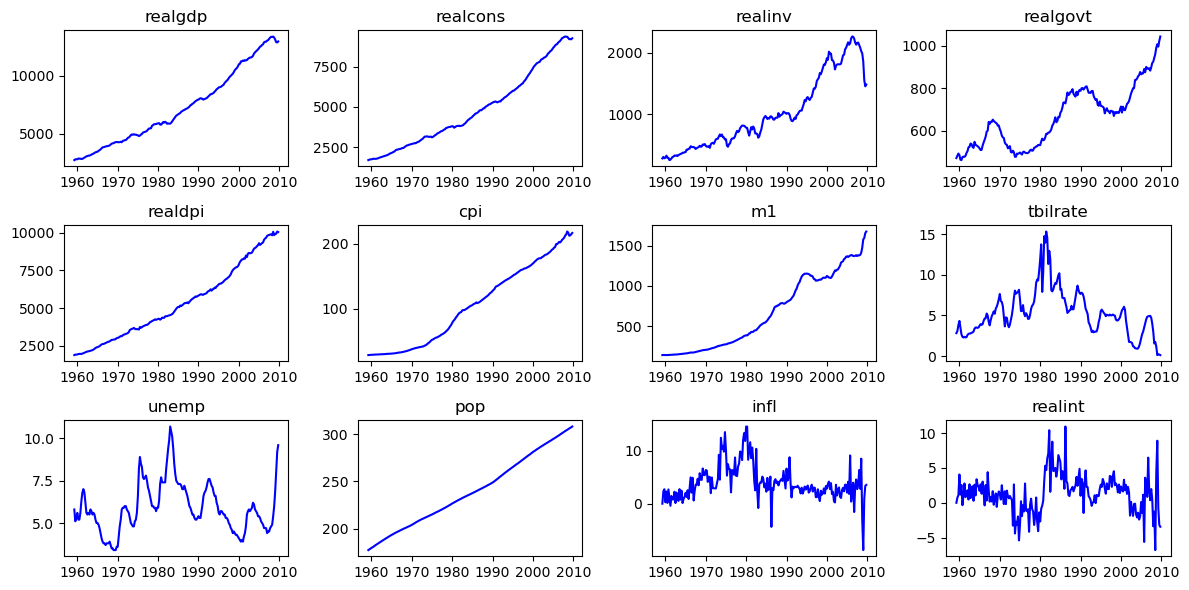

In [11]:
import matplotlib.pyplot as plt
# Create a 3x4 grid of plots
fig, axes = plt.subplots(3, 4, figsize=(12, 6))

# Plot each column in the DataFrame
for i, col in enumerate(df.columns):
    row, col_index = divmod(i, 4)
    axes[row, col_index].plot(df[col], color='blue')
    axes[row, col_index].set_title(col)

plt.tight_layout()
plt.show()


Let's begin simply with a few naive forecasters to predict inflation. We'll begin by splitting up data in train and test.

In [12]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series

from sktime.forecasting.naive import NaiveForecaster
import numpy as np

In [13]:
y = df['infl']
y_train, y_test = temporal_train_test_split(y, test_size=10)
fh = np.arange(1,11)

forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

forecaster2 = NaiveForecaster(strategy="drift")
forecaster2.fit(y_train)
y_pred2 = forecaster2.predict(fh)

forecaster3 = NaiveForecaster(sp=4)
forecaster3.fit(y_train)
y_pred3 = forecaster3.predict(fh)

Below we plot the very simplest forecasters. 
- Yellow is the actual data called validation that is the true development. 
- Green is a simple linear broadcast of the last observation.
- Red is a drift forecast that is a linear projection including a drift component to capture possible trends.
- Purple is the forecast season that includes the periodicity seen in the last quarters. 

Incorporating seasonality does better than the very simple models but neither model adequately capture the evolution of the test set. 

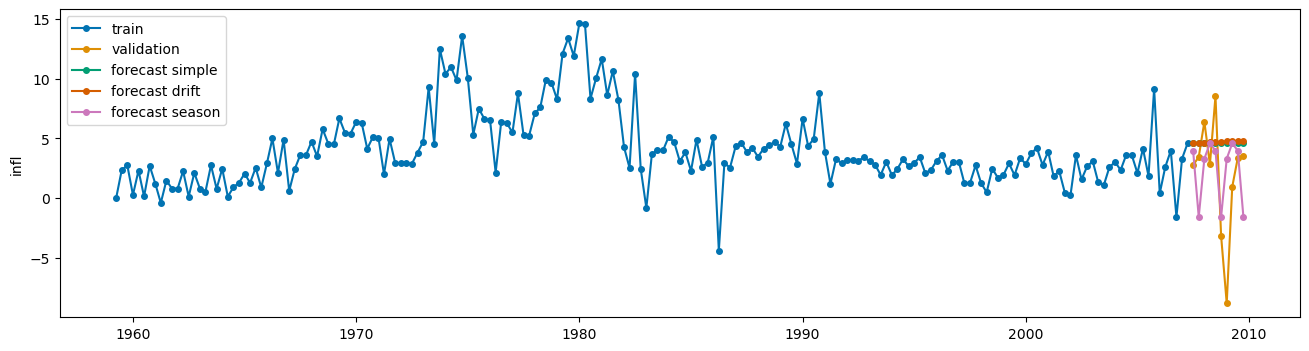

In [14]:
fig, ax = plot_series(y_train, y_test, y_pred, y_pred2, y_pred3, labels=["train", "validation", "forecast simple", "forecast drift", "forecast season"])

Let's check the errors of the simple forecast models.

In [15]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
print(f"Mean absolute percentage error: simple forecast: {mean_absolute_percentage_error(y_test, y_pred, symmetric=False):.4f}")
print(f"Mean absolute percentage error: forecast drift: {mean_absolute_percentage_error(y_test, y_pred2, symmetric=False):.4f}")
print(f"Mean absolute percentage error: forecast season periodicity: {mean_absolute_percentage_error(y_test, y_pred3, symmetric=False):.4f}")

Mean absolute percentage error: simple forecast: 1.0851
Mean absolute percentage error: forecast drift: 1.1280
Mean absolute percentage error: forecast season periodicity: 1.0913


Let's do an ARIMA and see if we can improve.

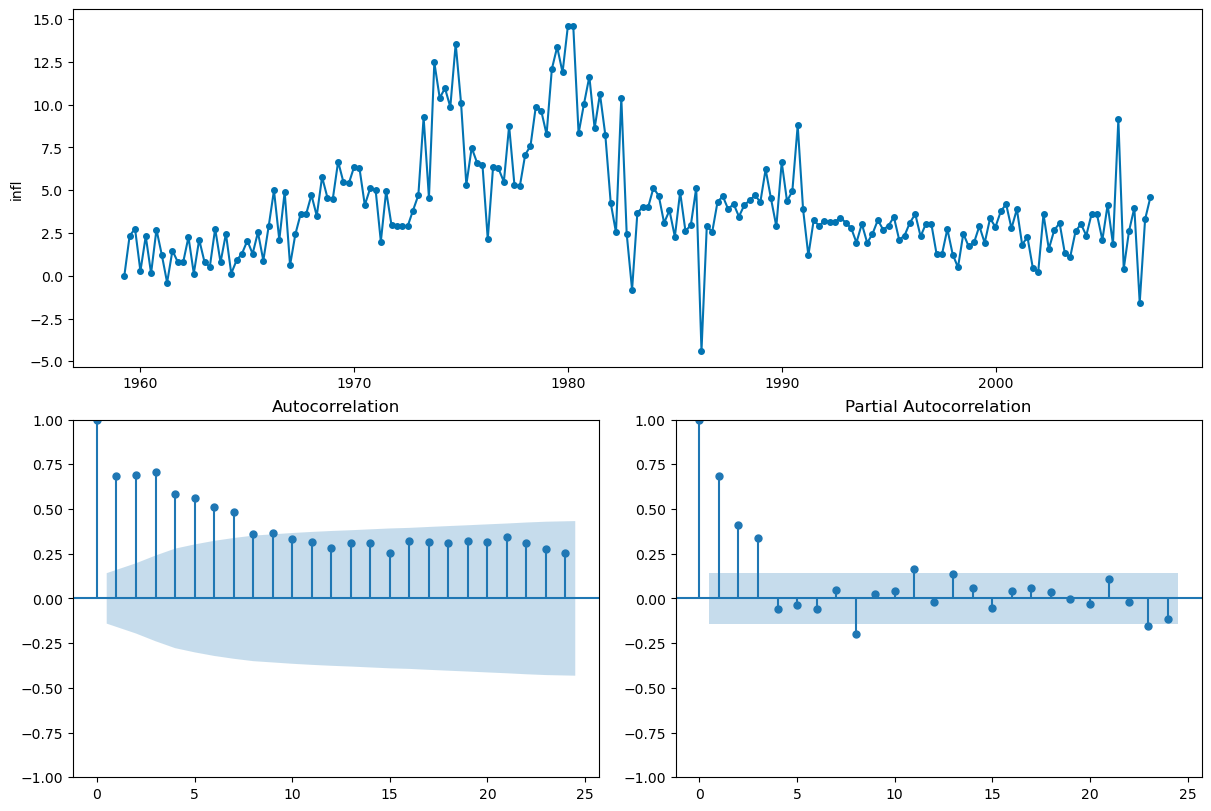

In [16]:
from sktime.utils.plotting import plot_correlations
fig, ax = plot_correlations(y_train)

So autocorrelation shows 9 significant spikes and partial autocorrelation 3 significant spikes suggesting that arima p and q parameters should be 3 and 9 respectively

In [17]:
from statsmodels.tsa.stattools import adfuller
adfuller(y_train)

(-2.430964935250835,
 0.13318680279498674,
 2,
 190,
 {'1%': -3.4652439354133255,
  '5%': -2.8768752281673717,
  '10%': -2.574944653739612},
 757.7021278615587)

In [18]:
from sktime.forecasting.arima import ARIMA
forecaster_arima = ARIMA(  
    order=(3, 1, 9), # P= 3, Q=9 and differencing=1
    seasonal_order=(0, 0, 0, 4),
    suppress_warnings=True)
forecaster_arima.fit(y_train)
y_pred_arima = forecaster_arima.predict(fh)

Augmented Dickey fuller test for stationary shows that test statistic is -2.43 and p-value is 0.133 for the training data, thus the series is not stationary but have some time-dependent structure, so let's also differentiate by one step in the model.

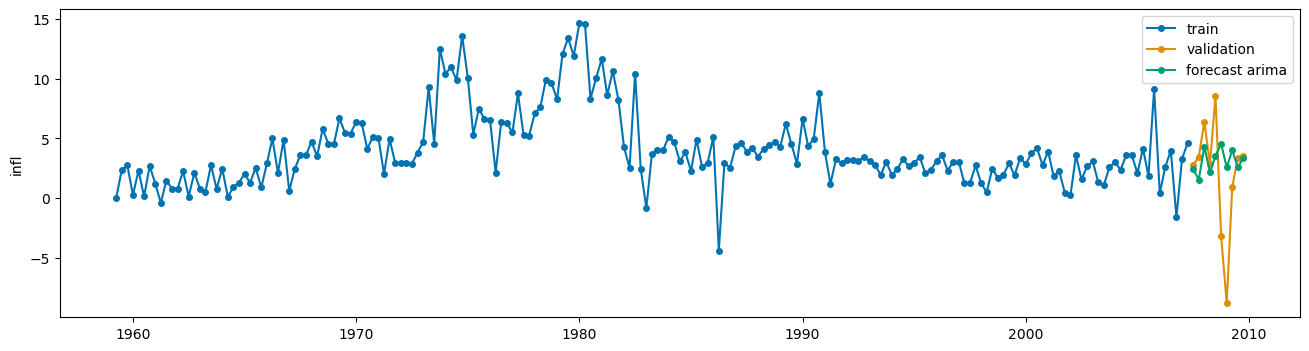

In [19]:
fig, ax = plot_series(y_train, y_test, y_pred_arima, labels=["train", "validation", "forecast arima"])

In [20]:
print(f"Mean absolute percentage error: forecast season: {mean_absolute_percentage_error(y_test, y_pred_arima, symmetric=False):.4f}")

Mean absolute percentage error: forecast season: 0.9095


So the Arima model had mean absolute percentage error against the validation data of 0.9095 which is an improvement against the simple models which all had an error above 1. But let's try more complex models to see if we can improve further. 

Let's first try the FB prophet model which has an algorithm to better capture trends and seasonality.

21:02:55 - cmdstanpy - INFO - Chain [1] start processing
21:02:55 - cmdstanpy - INFO - Chain [1] done processing


Mean absolute percentage error: forecast prophet: 0.7118


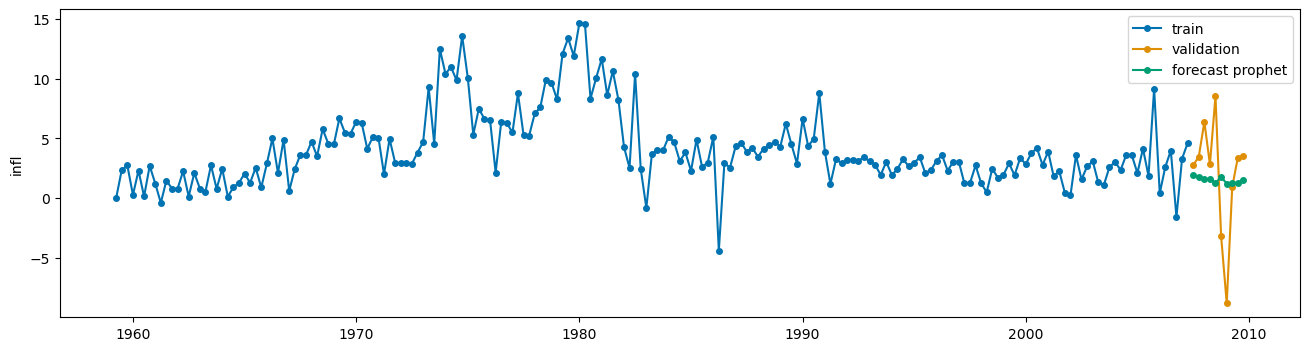

In [ ]:
from sktime.forecasting.fbprophet import Prophet
from sktime.utils.plotting import plot_series
forecaster = Prophet(  
    seasonality_mode='additive',
    n_changepoints=int(len(y_train) / 12))
forecaster.fit(y_train)  
y_pred_prophet = forecaster.predict(fh=range(1, 11)) 
fig, ax = plot_series(y_train, y_test, y_pred_prophet, labels=["train", "validation", "forecast prophet"])


In [23]:
print(f"Mean absolute percentage error: forecast prophet: {mean_absolute_percentage_error(y_test, y_pred_prophet, symmetric=False):.4f}")


Mean absolute percentage error: forecast prophet: 0.7118


So while the Prophet model seems to project a rather stable evolution, it lowers the mean absolute percentage error quite a lot compared to earlier models but let's continue.

Lastly we will try a VAR model and a neural network LSTM model to incorporate exogenous factors.

In [24]:
df

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [32]:
from sktime.forecasting.var import VAR
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.transformations.series.difference import Differencer
from sktime.forecasting.compose import TransformedTargetForecaster

# Use multiple targets (i.e., multivariate y)
y_multivar = df[['infl', 'realgdp', 'realinv', 'realcons', 'tbilrate', 'unemp']].astype(float)

# Split multivariate y
y_train_var, y_test_var = temporal_train_test_split(y_multivar, test_size=10)

# Forecast horizon
fh = ForecastingHorizon(y_test_var.index, is_relative=False)

# Create pipeline with differencing and VAR
forecaster_var = TransformedTargetForecaster(steps=[
    ("differencer", Differencer(lags=1)),
    ("forecaster", VAR())
])

# Fit and predict
forecaster_var.fit(y_train_var)
y_pred_var = forecaster_var.predict(fh=fh)


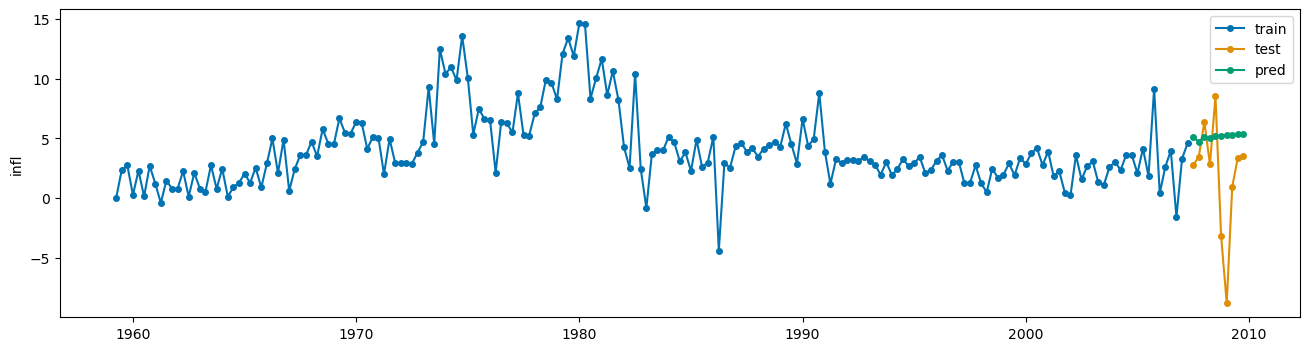

In [33]:
fig, ax = plot_series(y_train_var['infl'], y_test_var['infl'], y_pred_var['infl'], labels=["train", "test", "pred"])

In [34]:
print(f"Mean absolute percentage error: forecast prophet: {mean_absolute_percentage_error(y_test_var, y_pred_var, symmetric=False):.4f}")


Mean absolute percentage error: forecast prophet: 2.6884


The VAR model did not perform well, likely due to the complexity of the multivariate data. The Prophet model, however, provided a reasonable forecast and is often more robust to complex seasonal patterns and can handle holidays and other events.

Lastly, let's try a recurrent neural network (RNN) designed to learn and make predictions from sequential data, especially where long-range dependencies are important.
Standard RNNs struggle to retain information over long sequences due to the vanishing gradient problem. LSTMs were designed to overcome this limitation by using a memory cell and a series of gates that control the flow of information.

Let's run an LSTM model with 200 epochs meaning that it runs through the data 200 times updating the model parameters in order to better minimize the loss function and improve prediction accuracy. We have lowered the number from the standard 1,000 to reduce risk of overfitting the data.


In [54]:
import pandas as pd
from sktime.forecasting.neuralforecast import NeuralForecastLSTM
from sktime.datasets import load_macroeconomic
from sktime.forecasting.model_selection import temporal_train_test_split


# Select target and features
y = df['infl'].astype(float)
X = df.drop(columns=['infl', 'cpi']).astype(float)

# Split data
y_train_nn, y_test_nn, X_train_nn, X_test_nn = temporal_train_test_split(y, X, test_size=10)

# Initialize and fit the model
model = NeuralForecastLSTM(
    futr_exog_list=X_train_nn.columns.tolist(),  # column names
    freq='Q',
    max_steps = 200 # Maximum number of training epochs
    )
# Fit
model.fit(y=y_train_nn, X=X_train_nn, fh=range(1, 11))

# Forecast
y_pred = model.predict(fh=range(1, 11), X=X_test_nn)


Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='infl'>)

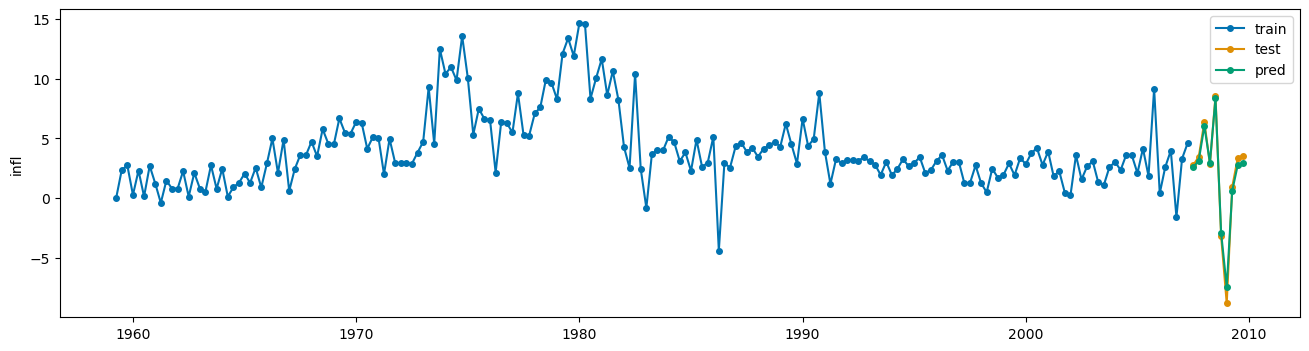

In [55]:
plot_series(y_train_nn, y_test_nn, y_pred, labels=["train", "test", "pred"])

In [56]:
print(f"Mean absolute percentage error: forecast neural network: {mean_absolute_percentage_error(y_test_nn, y_pred, symmetric=False):.4f}")

Mean absolute percentage error: forecast neural network: 0.1212


OK, so the recurrent neural network model performed really well with all exogenous variables and the predictions are very close to the validation data all 10 periods ahead. There are a few reasons why this model excels in predicting time series data over the previous models.
- Ability to Model Complex Nonlinear Relationships. Whereas the previous models are linear, LSTM are neural networks that can capture complex nonlinear patterns, including interactions and dependencies that traditional models miss.
- The model uses many exogenous variables. While VAR also models multivariate series, it still assumes linear relationships whereas can learn nonlinear dependencies across multiple features and across time, often leading to better predictive power.
- LSTMs are designed to remember information over longer time lags due to their gating mechanisms, which helps in complex temporal dynamics. ARIMA and VAR models on the other hand require manual differencing and parameter tuning to handle long-range dependencies.
- LSTMs can implicitly learn seasonality, trend, and other time-based effects if enough data and features are present because it has a lot of trainable parameters. Our LSTM model trained 518.000 parameters.
- LSTMs can be tuned with layers, units, activation functions, regularization, etc., offering more flexibility. Classical models have fewer parameters and can be underfit if the time series is complex. If the dataset is large enough and has rich covariate information, LSTM can leverage it better whereas ARIMA/VAR can struggle if data is noisy or complex.





In [ ]:
neuralforecast_model = model._forecaster.models[0] 

total_params = sum(p.numel() for p in neuralforecast_model.parameters() if p.requires_grad)
print(f"Total number of trainable parameters: {total_params}")


Total number of trainable parameters: 518501


In [61]:
error_arima = mean_absolute_percentage_error(y_test, y_pred_arima, symmetric=False)
error_prophet = mean_absolute_percentage_error(y_test, y_pred_prophet, symmetric=False)
error_var = mean_absolute_percentage_error(y_test_var, y_pred_var, symmetric=False)
error_nn = mean_absolute_percentage_error(y_test_nn, y_pred, symmetric=False)

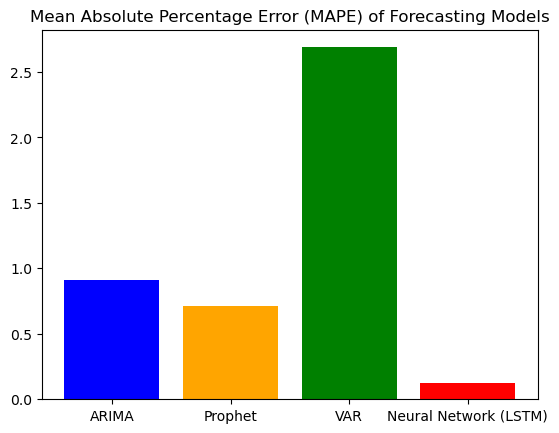

In [66]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.bar(
    ['ARIMA', 'Prophet', 'VAR', 'Neural Network (LSTM)'],
    [error_arima, error_prophet, error_var, error_nn],
    color=['blue', 'orange', 'green', 'red']
)
ax.set_title('Mean Absolute Percentage Error (MAPE) of Forecasting Models')
plt.show()